## Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
sns.set()

# Import Data

In [2]:
df=pd.read_csv('titanic_train.csv')

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

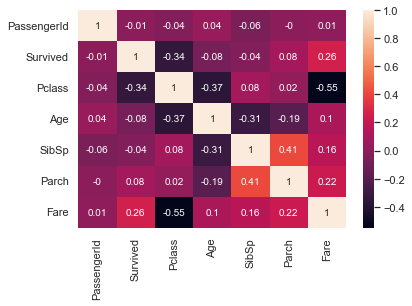

In [5]:
sns.heatmap(df.corr().round(2),annot=True)

# Data Cleaning

In [6]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [7]:
df.Sex=df.Sex.map({'male':1,'female':2})

In [8]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


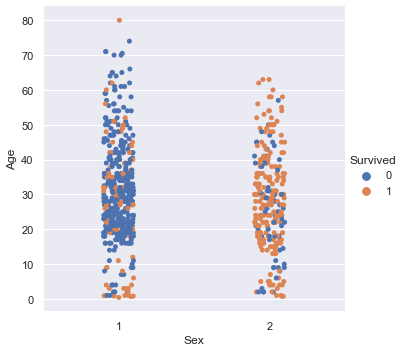

In [9]:
sns.catplot(y='Age',x='Sex',hue='Survived',data=df)

C:\Users\VIKAS REDDY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

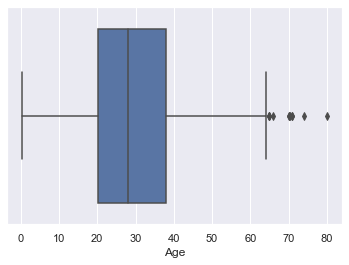

In [10]:
sns.boxplot(df.Age)

In [11]:
df.Age.fillna(df.Age.mean(),inplace=True) #----------Alter 1

In [12]:
df.Embarked.fillna(df['Embarked'].mode().values[0],inplace=True)

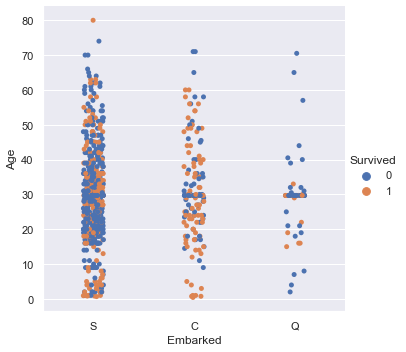

In [13]:
sns.catplot(x='Embarked',y='Age',hue='Survived',data=df)

In [14]:
df.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

# Cleaning Cabin,Ticket,Name column by feature Engineering

In [15]:
df.Cabin.fillna('str',inplace=True)    # --------------- Alter 2
def regxp(x):
    return re.sub(r'[0-9]','',x).split(' ')[0]
df.Cabin=df.Cabin.apply(regxp)

In [16]:
def regxp(x):                       # ------------------ Alter 3
    return re.sub(r'[0-9]','',x)
df.Ticket=df.Ticket.apply(regxp)

In [17]:
def regxp(x):                       # ------------------ Alter 4 (same number no use of varible as of now)
    return len(x.split(','))
df.Name=df.Name.apply(regxp)

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,2,1,22.0,1,0,A/,7.2500,str,S
1,2,1,1,2,2,38.0,1,0,PC,71.2833,C,C
2,3,1,3,2,2,26.0,0,0,STON/O.,7.9250,str,S
3,4,1,1,2,2,35.0,1,0,,53.1000,C,S
4,5,0,3,2,1,35.0,0,0,,8.0500,str,S


In [19]:
# Name has all values same hence remove name  column
df.Name.value_counts()

2    891
Name: Name, dtype: int64

In [20]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder

In [21]:
oe=OrdinalEncoder()

In [22]:
df.Embarked=(oe.fit_transform(np.array(df.Embarked).reshape(-1,1))).astype(int)
df.Cabin=(oe.fit_transform(np.array(df.Cabin).reshape(-1,1))).astype('int')

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,2,1,22.0,1,0,A/,7.2500,8,2
1,2,1,1,2,2,38.0,1,0,PC,71.2833,2,0
2,3,1,3,2,2,26.0,0,0,STON/O.,7.9250,8,2
3,4,1,1,2,2,35.0,1,0,,53.1000,2,2
4,5,0,3,2,1,35.0,0,0,,8.0500,8,2


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int32  
 11  Embarked     891 non-null    int32  
dtypes: float64(2), int32(2), int64(7), object(1)
memory usage: 76.7+ KB


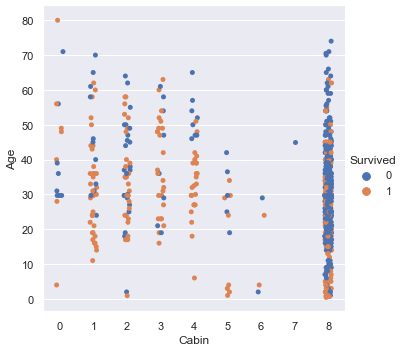

In [25]:
sns.catplot(x='Cabin',y='Age',hue='Survived',data=df)

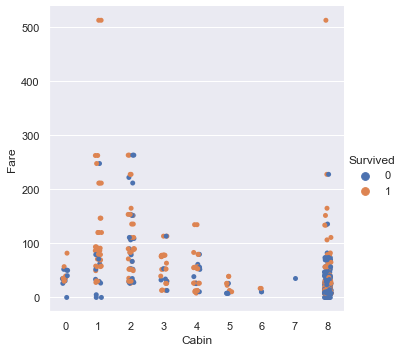

In [26]:
sns.catplot(x='Cabin',y='Fare',hue='Survived',data=df)

# Droping unique and extra columns

In [27]:
x=df.drop(['PassengerId','Survived','Name','Ticket'],axis=1)
y=df['Survived']

In [ ]:
# Correlation 

# Filter Methods of Feature Selection

<AxesSubplot:>

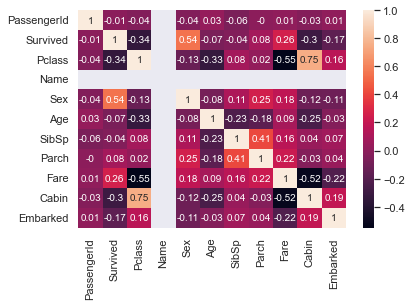

In [28]:
sns.heatmap(df.corr().round(2),annot=True)

In [ ]:
# Importing Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [30]:
# Splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [31]:
#from statsmodels.api import Logit

In [32]:
lg=LogisticRegression(max_iter=300)

In [33]:
lg.fit(x_train,y_train)

LogisticRegression(max_iter=300)

In [34]:
(lg.predict(x_test)==y_test).sum()/len(y_test)

0.8097014925373134

81 % is good accuracy

<BarContainer object of 8 artists>

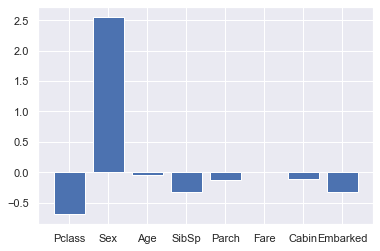

In [35]:
plt.bar(lg.feature_names_in_,lg.coef_[0])

In [ ]:
# checking the importance of features

In [36]:
lg.coef_[0]

array([-6.91373166e-01,  2.55694964e+00, -4.02230231e-02, -3.15008697e-01,
       -1.29260118e-01,  6.15611161e-04, -1.14797836e-01, -3.30361982e-01])

In [ ]:
# Removing features with less importance

0.8134328358208955


<BarContainer object of 7 artists>

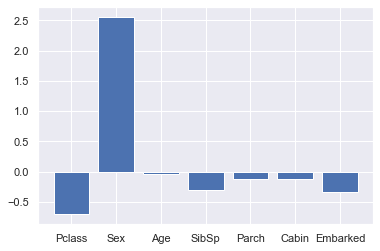

In [37]:
lg=LogisticRegression(max_iter=300)
lg.fit(x_train.drop('Fare',axis=1),y_train)
print((lg.predict(x_test.drop('Fare',axis=1))==y_test).sum()/len(y_test))
plt.bar(lg.feature_names_in_,lg.coef_[0])

81.3 % is final accuracy we got

0.7985074626865671


<BarContainer object of 4 artists>

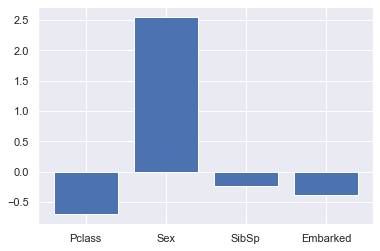

In [38]:
lg=LogisticRegression(max_iter=300)
lg.fit(x_train.drop(['Fare','Parch','Age','Cabin'],axis=1),y_train)
print((lg.predict(x_test.drop(['Fare','Parch','Age','Cabin'],axis=1))==y_test).sum()/len(y_test))
plt.bar(lg.feature_names_in_,lg.coef_[0])

80 % is the prediction accuracy which is good

# Wrapper methods ( Checking if any better is possible)

In [39]:
from sklearn.feature_selection import chi2,SelectFromModel,SelectKBest,f_classif

0


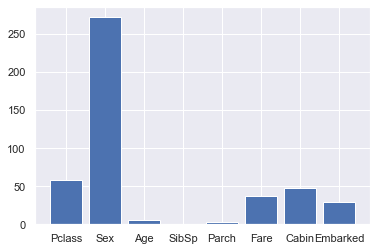

1


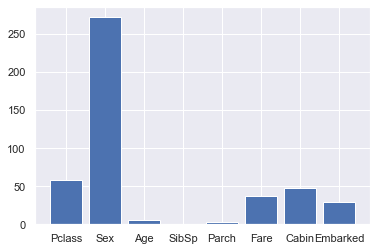

2


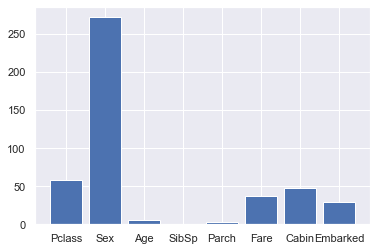

3


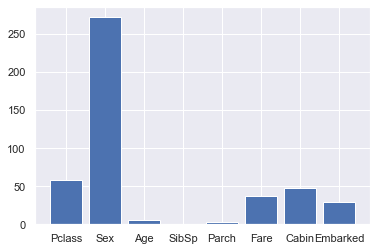

4


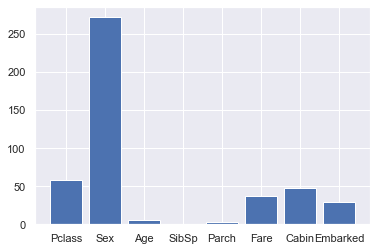

5


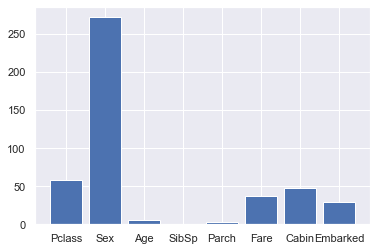

6


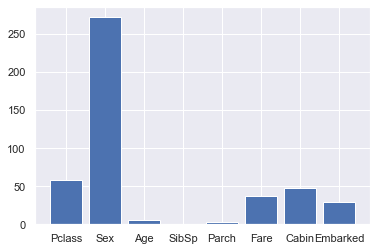

7


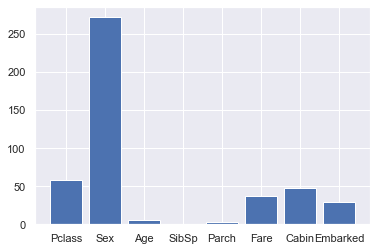

In [40]:
for i in range(len(x_train.columns)):
    print(i)
    skb=SelectKBest(f_classif,k=i)
    skb=skb.fit(x_train,y_train)
    plt.bar(skb.feature_names_in_,skb.scores_)
    plt.show()

In [41]:
skb=SelectKBest(chi2,k=3)
skb=skb.fit(x_train,y_train)

In [42]:
skb.get_feature_names_out()
skb.scores_

array([1.62269472e+01, 3.23156431e+01, 3.28993172e+01, 1.22777325e+00,
       4.47868005e+00, 2.85583054e+03, 4.11895855e+01, 1.18115961e+01])

In [43]:
skb.feature_names_in_

array(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'], dtype=object)

In [44]:
sfm=SelectFromModel(LogisticRegression(max_iter=300))

In [45]:
sfm.fit(x_train,y_train)

SelectFromModel(estimator=LogisticRegression(max_iter=300))

In [46]:
sfm.get_feature_names_out()

array(['Pclass', 'Sex'], dtype=object)

In [47]:
sfm.get_support()

array([ True,  True, False, False, False, False, False, False])

In [48]:
lg.fit(x_train.drop(['Age', 'SibSp'],axis=1),y_train)

LogisticRegression(max_iter=300)

In [49]:
(lg.predict(x_test.drop(['Age', 'SibSp'],axis=1))==y_test).sum()/len(y_train)

0.33868378812199035

In [50]:
lg.predict(x_test.drop(['Age', 'SibSp'],axis=1))

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0], dtype=int64)

# Fitting is not good with Wrapper methods

https://towardsdatascience.com/weighted-logistic-regression-for-imbalanced-dataset-9a5cd88e68b